# Eurovision Bias Analysis

Ronan Smyth L00176857
James Byrne L00173346

Import libraries - I had to do this several times, I'm not sure if it's a glitch with colab or something else I'm not aware of.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

Bar chart of total points scored. This was just trying to get my head around the data.

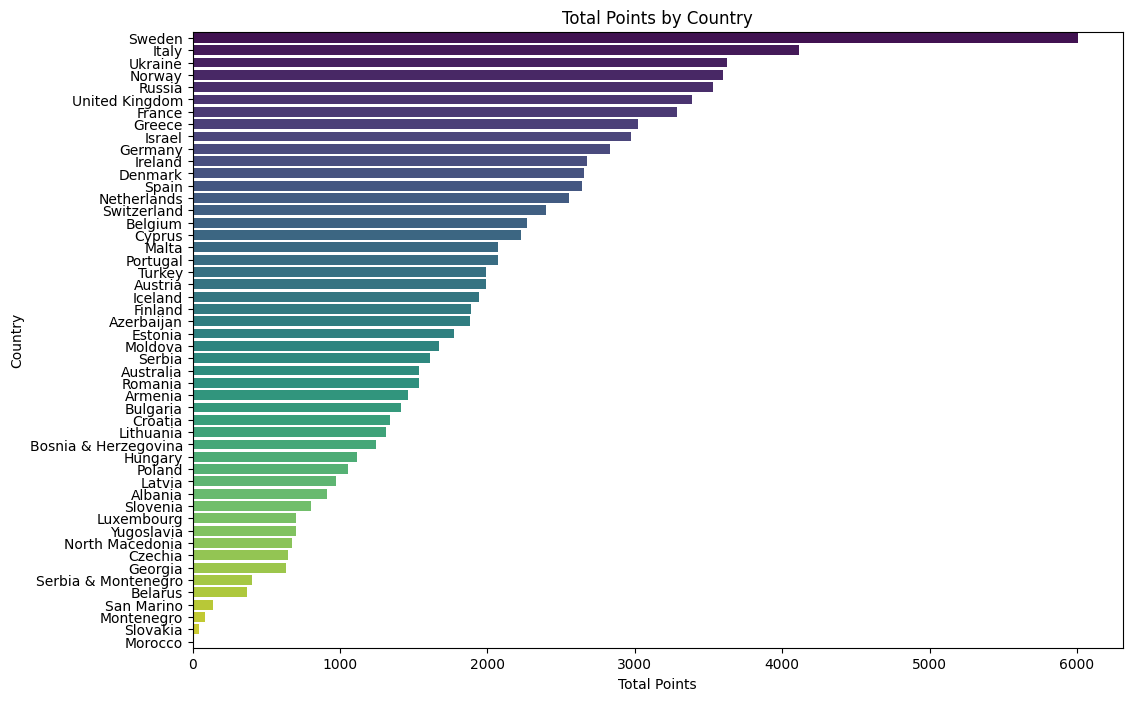

In [ ]:
# Import dataset as name df(data frame).
df = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Create set to see unique countries.
uniqueCountries = set(df['to_country'].unique())

# Create DataFrame with total points / country.
totalPoints = df.groupby('to_country')['points_final'].sum().reset_index()

# Filter df to include only countries in uniqueCountries set.
totalPoints = totalPoints[totalPoints['to_country'].isin(uniqueCountries)] # .isin() makes sure only countries in unique list enter

# Sort DataFrame by total points highest to lowest.
totalPoints = totalPoints.sort_values(by='points_final', ascending=False)

# Create bar graph.
plt.figure(figsize=(12, 8))
sns.barplot(x='points_final', y='to_country', data=totalPoints, palette='viridis')
plt.title('Total Points by Country')
plt.xlabel('Total Points')
plt.ylabel('Country')
plt.show()

Scatterplot - Compare total points to number of English-language entries per country. Again just assessing the data. Larger data points represent higher numbers of English-language songs.

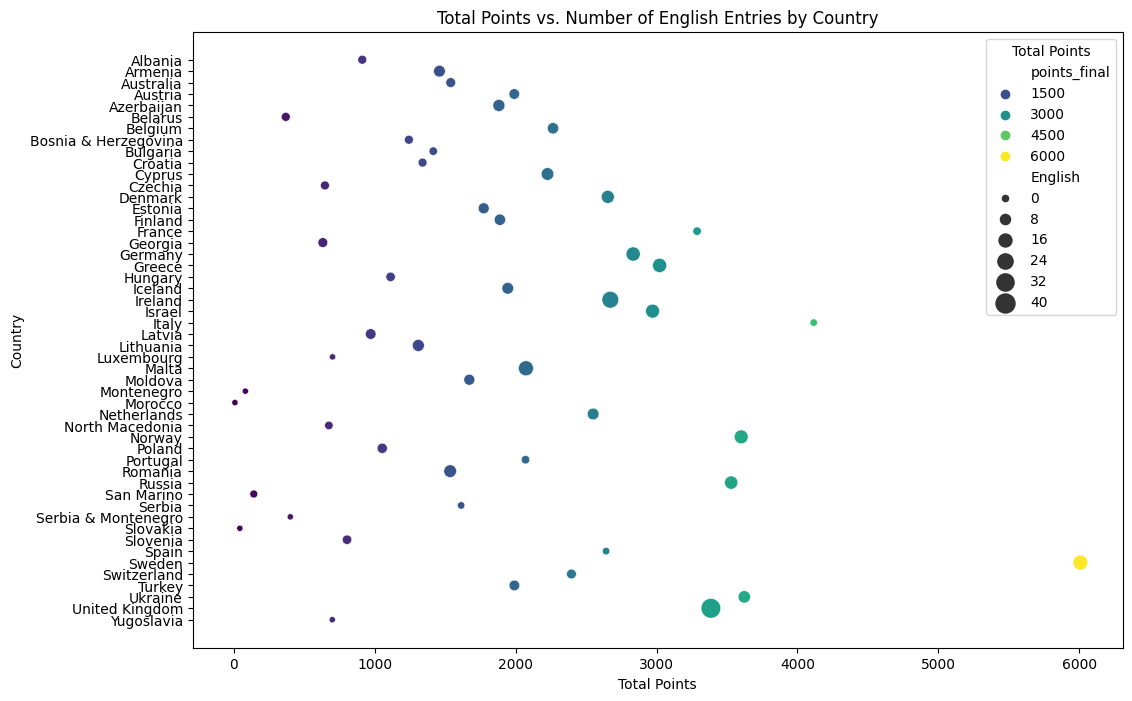

In [ ]:
# Create df with total points & count the English entries per country.
graphDF = df.groupby('to_country').agg({'points_final': 'sum', 'English': 'sum'}).reset_index()

# Filter df to include only countries in uniqueCountries set.
graphDF = graphDF[graphDF['to_country'].isin(uniqueCountries)]

# Create scatter graph with larger points for higher number of English-language entries.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='points_final', y='to_country', size='English', data=graphDF, hue='points_final', palette='viridis', sizes=(20, 200))

# Label and show the graph.
plt.title('Total Points vs. Number of English Entries by Country')
plt.xlabel('Total Points')
plt.ylabel('Country')
plt.legend(title='Total Points')
plt.show()

# Relationship between the number of English-language entries per country and the success of that country.

Linear Regression - Examine the relationship between total points & No. of English-language entries per unique country.
The result shows a moderate correlation between the dependant and independant variables.

Mean Squared Error: 448825.1467283647
R-squared: 0.579008098542062


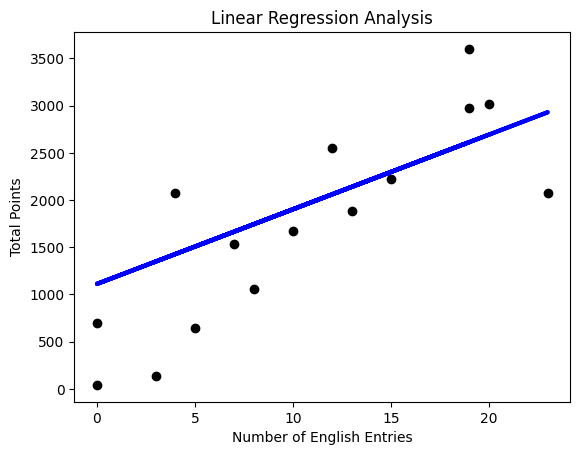

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

df = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Aggregate data by country.
# Add total points and count no. of English-language entries for each country.
groupData = df.groupby('to_country').agg(
    totalPoints=('points_final', 'sum'),  # Sum points per country
    englishEntries=('English', 'sum')     # Count English entries per country
).reset_index()

# Prepare the variables: dependant and independant.
X = groupData['english_entries'].values.reshape(-1,1)  # Independent variable
y = groupData['total_points'].values.reshape(-1,1)    # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plotting the results
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Number of English Entries')
plt.ylabel('Total Points')
plt.title('Linear Regression Analysis')
plt.show()

Linear Regression - Examine relationship between finishing Placement & No. of English-language entries per country. An average finishing place was selected rather than an aggregate.
Quite a weak correlation canbe seen below.

Mean Squared Error (Average Final Place): 10.348403076950015
R-squared (Average Final Place): 0.01629913729529109


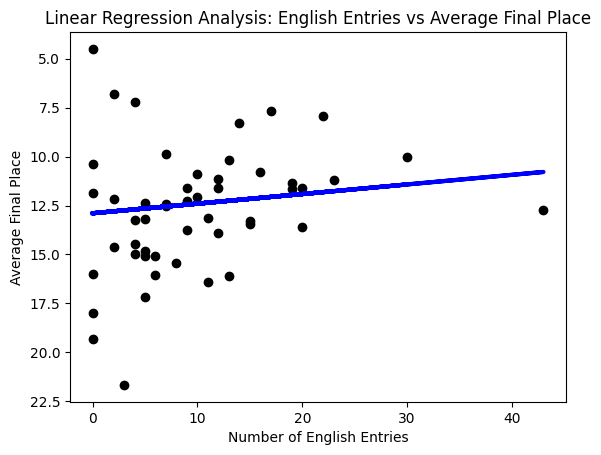

In [ ]:
# Calculate average points and count no. of English-language entries for each country.
avgPlaceData = df.groupby('to_country').agg(
    avgFinalPlace=('place_final', 'mean'),  # Average final place per country
    english_entries=('English', 'sum')       # Count of English entries per country
).reset_index()

# Prepare the variables: dependant and independant.
X_avgPlace = avgPlaceData['english_entries'].values.reshape(-1, 1)  # Independent variable
y_avgPlace = avgPlaceData['avgFinalPlace'].values.reshape(-1, 1)  # Dependent variable

# Splitting the dataset into training and testing sets: 70/30.
X_train_avg_place, X_test_avg_place, y_train_avg_place, y_test_avg_place = train_test_split(X_avgPlace, y_avgPlace, test_size=0.3, random_state=0)

# Create a linear regression model.
model = LinearRegression()

# Train the model.
model.fit(X_train_avg_place, y_train_avg_place)

# Make predictions.
y_pred_avg_place = model.predict(X_test_avg_place)

# Evaluate the model.
mse_avg_place = mean_squared_error(y_test_avg_place, y_pred_avg_place)
r2_avg_place = r2_score(y_test_avg_place, y_pred_avg_place)

# Print the metrics.
print("Mean Squared Error (Average Final Place):", mse_avg_place)
print("R-squared (Average Final Place):", r2_avg_place)

# Graph results with all data points.
plt.scatter(avgPlaceData['english_entries'], avgPlaceData['avgFinalPlace'], color='black')  # Plot all data points
plt.plot(avgPlaceData['english_entries'], model.predict(avgPlaceData['english_entries'].values.reshape(-1,1)), color='blue', linewidth=3)  # Regression line
plt.xlabel('Number of English Entries')
plt.ylabel('Average Final Place')
plt.title('Linear Regression Analysis: English Entries vs Average Final Place')
plt.gca().invert_yaxis()  # Invert y-axis: lower final place is better.
plt.show()

Polynomial Regression - Examine the relationship between the average final placement and No. of English-language entries per country. I wanted to experiment with polynomial regression since the results of the linear regression, although showing a correlation, were weak.
I tries using a degree of polynomial of 2 & 3 to much the same result.
The polynomial regression also showed little correlation.

Mean Squared Error (Average Final Place): 11.428882765904655
R-squared (Average Final Place): -0.08640934770052655


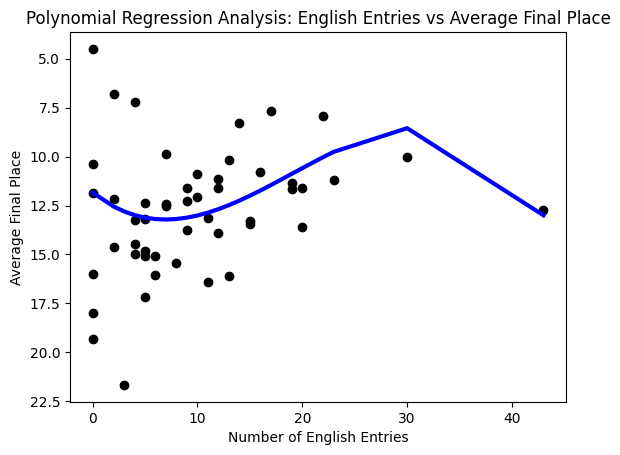

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Aggregating the data for average final place and number of English entries
avgPlaceData = df.groupby('to_country').agg(
    avgFinalPlace=('place_final', 'mean'),  # Average final place per country
    englishEntries=('English', 'sum')       # Count of English entries per country
).reset_index()

# Prepare the variables: dependant and independant.
X_avg_place = avgPlaceData['englishEntries'].values.reshape(-1, 1)  # Independent variable
y_avg_place = avgPlaceData['avgFinalPlace'].values.reshape(-1, 1)  # Dependent variable

# Splitting the dataset into training and testing sets
X_train_avg_place, X_test_avg_place, y_train_avg_place, y_test_avg_place = train_test_split(X_avg_place, y_avg_place, test_size=0.3, random_state=0)

# Polynomial Features.
degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree)
X_poly_train_avg_place = poly.fit_transform(X_train_avg_place)
X_poly_test_avg_place = poly.transform(X_test_avg_place)
X_poly_avg_place = poly.transform(X_avg_place)

# Create and train the polynomial regression model.
model_poly_avg_place = LinearRegression()
model_poly_avg_place.fit(X_poly_train_avg_place, y_train_avg_place)

# Make predictions.
y_poly_pred_avg_place = model_poly_avg_place.predict(X_poly_test_avg_place)

# Evaluate the model
mse_poly_avg_place = mean_squared_error(y_test_avg_place, y_poly_pred_avg_place)
r2_poly_avg_place = r2_score(y_test_avg_place, y_poly_pred_avg_place)

# Print the metrics
print("Mean Squared Error (Average Final Place):", mse_poly_avg_place)
print("R-squared (Average Final Place):", r2_poly_avg_place)

# Plotting the results
plt.scatter(avgPlaceData['englishEntries'], avgPlaceData['avgFinalPlace'], color='black')  # Plot all data points
sorted_order = np.argsort(avgPlaceData['englishEntries'])  # Sorting for a smooth line
plt.plot(avgPlaceData['englishEntries'][sorted_order], model_poly_avg_place.predict(X_poly_avg_place)[sorted_order], color='blue', linewidth=3)  # Polynomial regression line
plt.xlabel('Number of English Entries')
plt.ylabel('Average Final Place')
plt.title('Polynomial Regression Analysis: English Entries vs Average Final Place')
plt.gca().invert_yaxis()  # Invert y-axis as lower final place is better
plt.show()

# Running Order

Linear Regression - Examining the correlation between a summed total of perfmance order and total points.
A moderate correlation is observed.

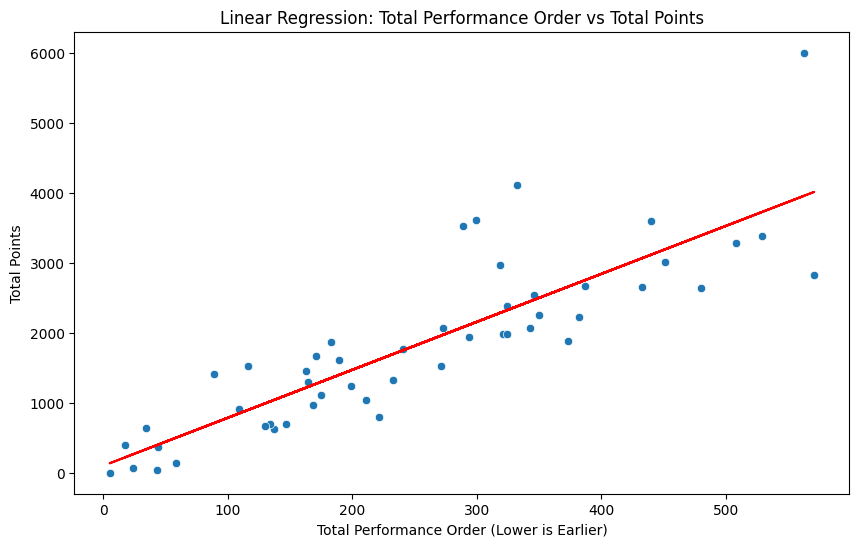

In [ ]:
# Grouping by country and adding total points and performance order
groupedData = df.groupby('to_country').agg({'running_final': 'sum', 'points_final': 'sum'}).reset_index()

# Renaming columns for clarity
groupedData.rename(columns={'running_final': 'Total Performance Order', 'points_final': 'Total Points'}, inplace=True)

# Prepare the variables: dependant and independant.
X = groupedData[['Total Performance Order']].values
y = groupedData['Total Points'].values

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predicting the values
y_pred = model.predict(X)

# Create the graph.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Performance Order', y='Total Points', data = groupedData)
plt.plot(X, y_pred, color='red')  # regression line
plt.title('Linear Regression: Total Performance Order vs Total Points')
plt.xlabel('Total Performance Order (Lower is Earlier)')
plt.ylabel('Total Points')
plt.show()


Linear Regression - Examining the relationship between summed performance order data and summed final placement.
The line downward shows that as the performances occur later, the total place tends to decrease. This could suggest that performing later is associated with better placement.

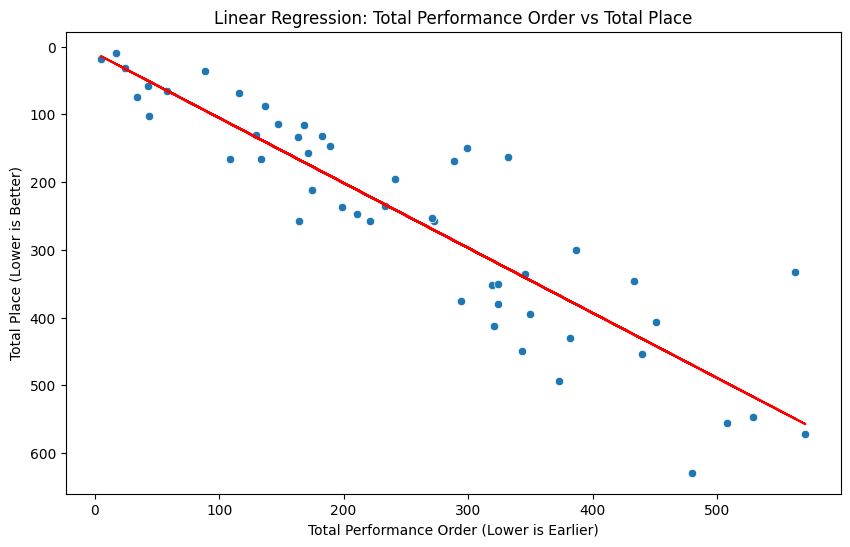

In [ ]:
# Grouping by country and summing up total performance order and place_final.
groupDataPlace = df.groupby('to_country').agg({'running_final': 'sum', 'place_final': 'sum'}).reset_index()

# Renaming columns for clarity.
groupDataPlace.rename(columns={'running_final': 'Total Performance Order', 'place_final': 'Total Place'}, inplace=True)

# Prepare the variables: dependant and independant.
X_place = groupDataPlace[['Total Performance Order']].values
y_place = groupDataPlace['Total Place'].values

# Create a linear regression model for place_final
modelPlace = LinearRegression()
modelPlace.fit(X_place, y_place)

# Predicting the values for place_final.
y_pred_place = modelPlace.predict(X_place)

# Create the graph.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Performance Order', y='Total Place', data = groupDataPlace)
plt.plot(X_place, y_pred_place, color='red')  # regression line
plt.title('Linear Regression: Total Performance Order vs Total Place')
plt.xlabel('Total Performance Order (Lower is Earlier)')
plt.ylabel('Total Place (Lower is Better)')
plt.gca().invert_yaxis()  # Inverting y-axis as lower place is better
plt.show()


It occured to me at this point that averages may show the data in a different light. Using more or less the same code I worked with the average figures below, but the results were contradictory.
The left graph shows that performing later is positively correlated with receiving more points, but the right one suggests that performing later is associated with a less favorable place.
They not only contradict each other but also the previous regressions.

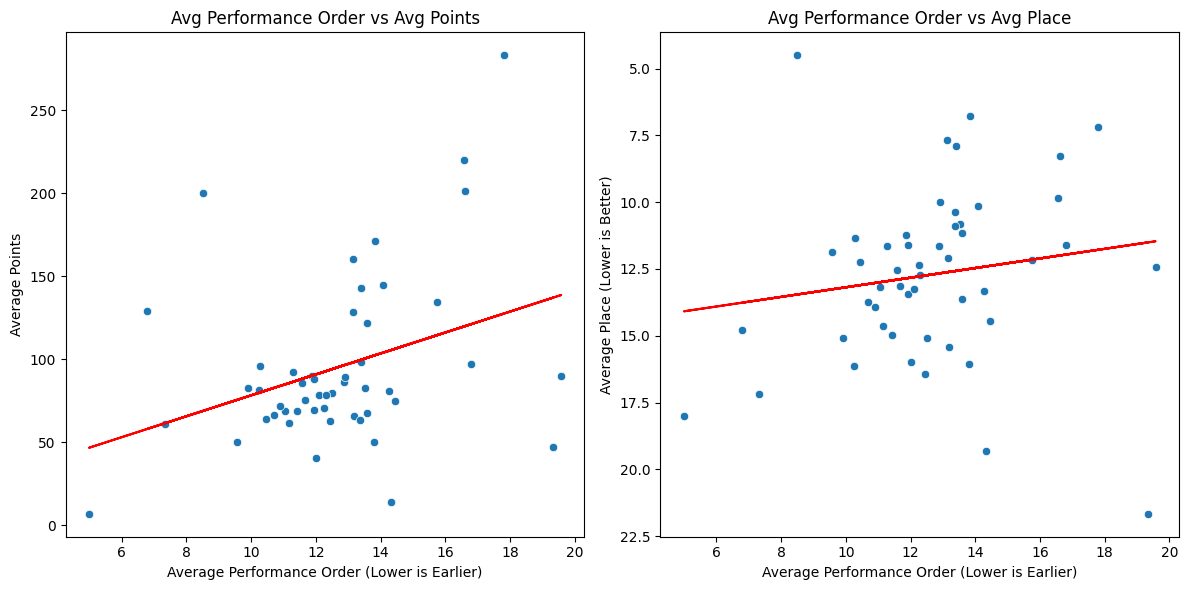

In [ ]:
# Grouping by country and calculating the average performance order and average points.
avgDataPoints = df.groupby('to_country').agg({'running_final': 'mean', 'points_final': 'mean'}).reset_index()

# Renaming columns for clarity.
avgDataPoints.rename(columns={'running_final': 'Average Performance Order', 'points_final': 'Average Points'}, inplace=True)

# Prepare the variables: dependant and independant.
X_avg_points = avgDataPoints[['Average Performance Order']].values
y_avg_points = avgDataPoints['Average Points'].values

# Create a linear regression model for points_final.
modelAvgPoints = LinearRegression()
modelAvgPoints.fit(X_avg_points, y_avg_points)

# Predicting the values for points_final.
y_pred_avg_points = modelAvgPoints.predict(X_avg_points)

# For place_final
# Grouping by country and calculating the average performance order and average place_final
avgDataPlace = df.groupby('to_country').agg({'running_final': 'mean', 'place_final': 'mean'}).reset_index()

# Renaming columns for clarity
avgDataPlace.rename(columns={'running_final': 'Average Performance Order', 'place_final': 'Average Place'}, inplace=True)

# Preparing the linear regression model for place_final
X_avg_place = avgDataPlace[['Average Performance Order']].values
y_avg_place = avgDataPlace['Average Place'].values

# Create a linear regression model for place_final
modelAvgPlace = LinearRegression()
modelAvgPlace.fit(X_avg_place, y_avg_place)

# Predicting the values for place_final
y_pred_avg_place = modelAvgPlace.predict(X_avg_place)

# Plotting for both points_final and place_final
plt.figure(figsize=(12, 6))

# Plot for points_final
plt.subplot(1, 2, 1)
sns.scatterplot(x='Average Performance Order', y='Average Points', data = avgDataPoints)
plt.plot(X_avg_points, y_pred_avg_points, color='red')  # regression line for points_final
plt.title('Avg Performance Order vs Avg Points')
plt.xlabel('Average Performance Order (Lower is Earlier)')
plt.ylabel('Average Points')

# Plot for place_final
plt.subplot(1, 2, 2)
sns.scatterplot(x='Average Performance Order', y='Average Place', data = avgDataPlace)
plt.plot(X_avg_place, y_pred_avg_place, color='red')  # regression line for place_final
plt.title('Avg Performance Order vs Avg Place')
plt.xlabel('Average Performance Order (Lower is Earlier)')
plt.ylabel('Average Place (Lower is Better)')
plt.gca().invert_yaxis()  # Inverting y-axis as lower place is better

plt.tight_layout()
plt.show()


I deduced that regression may not be the optimal machine learning technique to use given the previous results and decided to experiment with k-means clustering for the same analysis as above. That is, the possible correlation between average performance order data and average final placement.
The results do infer a relationship between later performance and better final placement in the 2 k-means clustering graphs below.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


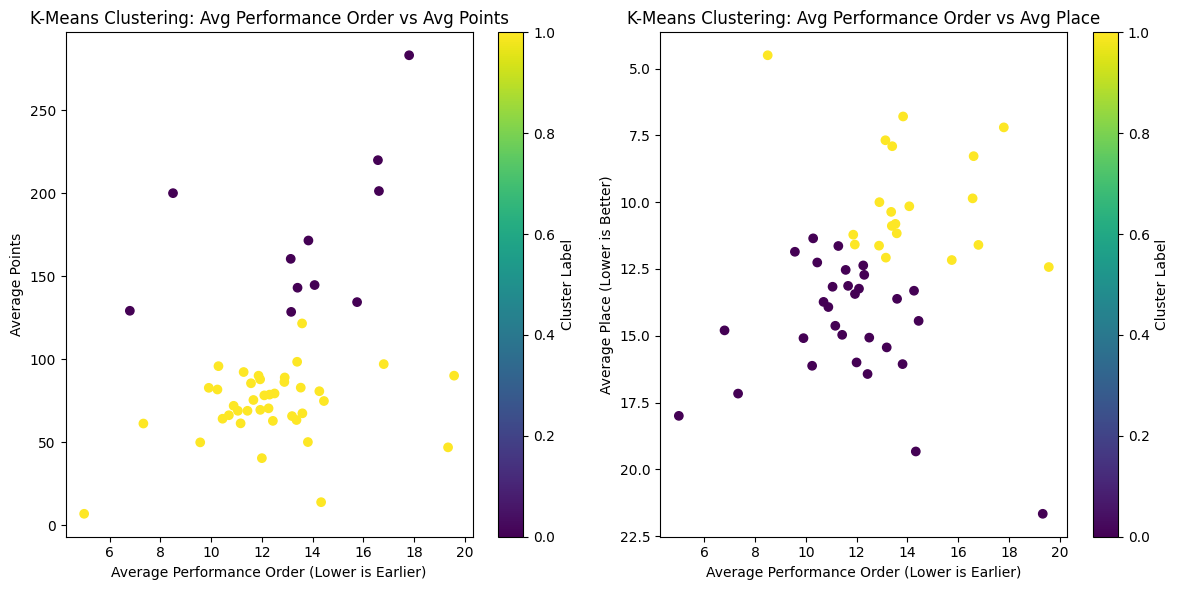

In [ ]:
from sklearn.cluster import KMeans

# K-Means Clustering for both points_final and place_final using average performance order

# Set the number of clusters (k).
k = 2


# Preparing clusters for average points assessment.
X_cluster_points = avgDataPoints[['Average Performance Order', 'Average Points']].values

# Creating and fitting the k-means model for points_final.
kmeansPoints = KMeans(n_clusters=k, random_state=0).fit(X_cluster_points)

# Predicting the cluster labels for points_final.
labelsPoints = kmeansPoints.labels_

# Preparing clusters for place_final.
X_cluster_place = avgDataPlace[['Average Performance Order', 'Average Place']].values

# Creating and fitting the k-means model for place_final.
kmeansPlace = KMeans(n_clusters=k, random_state=0).fit(X_cluster_place)

# Predicting the cluster labels for place_final.
labelsPlace = kmeansPlace.labels_

# Plotting for both points_final and place_final with clusters.
plt.figure(figsize=(12, 6))

# Graph points.
plt.subplot(1, 2, 1)
plt.scatter(X_cluster_points[:, 0], X_cluster_points[:, 1], c=labelsPoints)
plt.title('K-Means Clustering: Avg Performance Order vs Avg Points')
plt.xlabel('Average Performance Order (Lower is Earlier)')
plt.ylabel('Average Points')
plt.colorbar(label='Cluster Label')

# Graph placement.
plt.subplot(1, 2, 2)
plt.scatter(X_cluster_place[:, 0], X_cluster_place[:, 1], c = labelsPlace)
plt.title('K-Means Clustering: Avg Performance Order vs Avg Place')
plt.xlabel('Average Performance Order (Lower is Earlier)')
plt.ylabel('Average Place (Lower is Better)')
plt.colorbar(label='Cluster Label')
plt.gca().invert_yaxis()  # Inverting y-axis as lower place is better

plt.tight_layout()
plt.show()

# Decision Trees

1980-2023 Table Generator

In [ ]:
import pandas as pd # this here will import pandas which is what we will be using for this notebook

# This Function is being used to convert numerical values to words eg the half collum in the data et has 1 or 2 so it will check that collem and make so being display as either 1st half or 2nd half
def convert_to_words(df):
    df.index = range(1, len(df) + 1)  # this is to make sure that the index starts from 1
    df.index.name = 'Combo'

    # Mapping numerical values to words
    Languages = {0: 'Non-English', 1: 'English'}
    Genders = {1: 'Male', 2: 'Female', 3: 'Mixed'}
    HalfOfFinal = {1: '1st Half', 2: '2nd Half'}

    # Applying mappings to DataFrame columns
    df['English'] = df['English'].map(Languages)
    df['num_Gender'] = df['num_Gender'].map(Genders)
    df['Half'] = df['Half'].map(HalfOfFinal)

    return df

# Loads the dataset from Excel file
data = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Checks the occurrences of Place_Final Collum that it is eqiual to  1 for each combination that then English,num_Genders and Half coollems make up.
groupedData = data.groupby(['English', 'num_Gender', 'Half'])['place_final'].apply(lambda x: (x == 1).sum()).reset_index(name='WinsCount')

# Calculate total occurrences for each combination from the entire dataset by seeing thw total collums in the dataset which was done manully by me.
totalCount = 1015

# Merge the total counts as a new column in the grouped data that was made earliy in the code
groupedData['Total'] = totalCount

# Calculate percentage likelihood of Place_Final equalling to 1 for each combination andd thens rounds the persenage up to 0.1
groupedData['PercentOfWining'] = (groupedData['WinsCount'] / groupedData['Total']) * 100
# Round the percentages to one decimal place
groupedData['PercentOfWining'] = groupedData['PercentOfWining'].round(1)

# Sort the DataFrame by 'PercentOfWining' in highest to lowest order
groupedData = groupedData.sort_values(by='PercentOfWining', ascending=False)

# Formats the DataFrame
formatted_data = convert_to_words(groupedData)

# Display the formatted table to the user

for idx, row in formatted_data.head(10).iterrows():
    print(f"{row['English']} |  {row['num_Gender']} | {row['Half']} | {row['WinsCount']}  | {row['PercentOfWining']}%")

English |  Female | 2nd Half | 11  | 1.1%
English |  Male | 2nd Half | 7  | 0.7%
Non-English |  Female | 2nd Half | 6  | 0.6%
Non-English |  Male | 1st Half | 4  | 0.4%
English |  Male | 1st Half | 4  | 0.4%
Non-English |  Female | 1st Half | 3  | 0.3%
English |  Female | 1st Half | 3  | 0.3%
English |  Mixed | 2nd Half | 3  | 0.3%
Non-English |  Male | 2nd Half | 2  | 0.2%
Non-English |  Mixed | 1st Half | 0  | 0.0%


Pie Chart 1980 - 2023

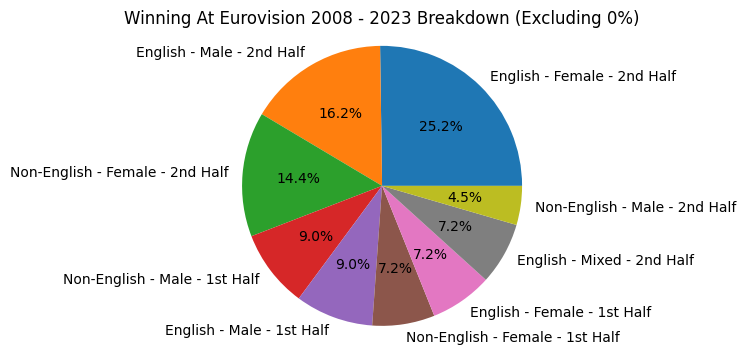

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to exclude rows where 'PercentOfWining' is equal to 0
noZeros = formatted_data[formatted_data['PercentOfWining'] != 0]

# Pie chart to display size
plt.figure(figsize=(5, 4))
#header name
plt.pie(nonZeros.head(10)['PercentOfWining'], labels=nonZeros.head(10).apply(lambda row: f"{row['English']} - {row['num_Gender']} - {row['Half']}", axis=1), autopct='%1.1f%%')
#title of pie chart
plt.title('Winning At Eurovision 1980 - 2023 Breakdown ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#shows the pie chart
plt.show()

1980 -2023 Decision Tree

Mean Squared Error (Decision Tree): 53.031023605432715


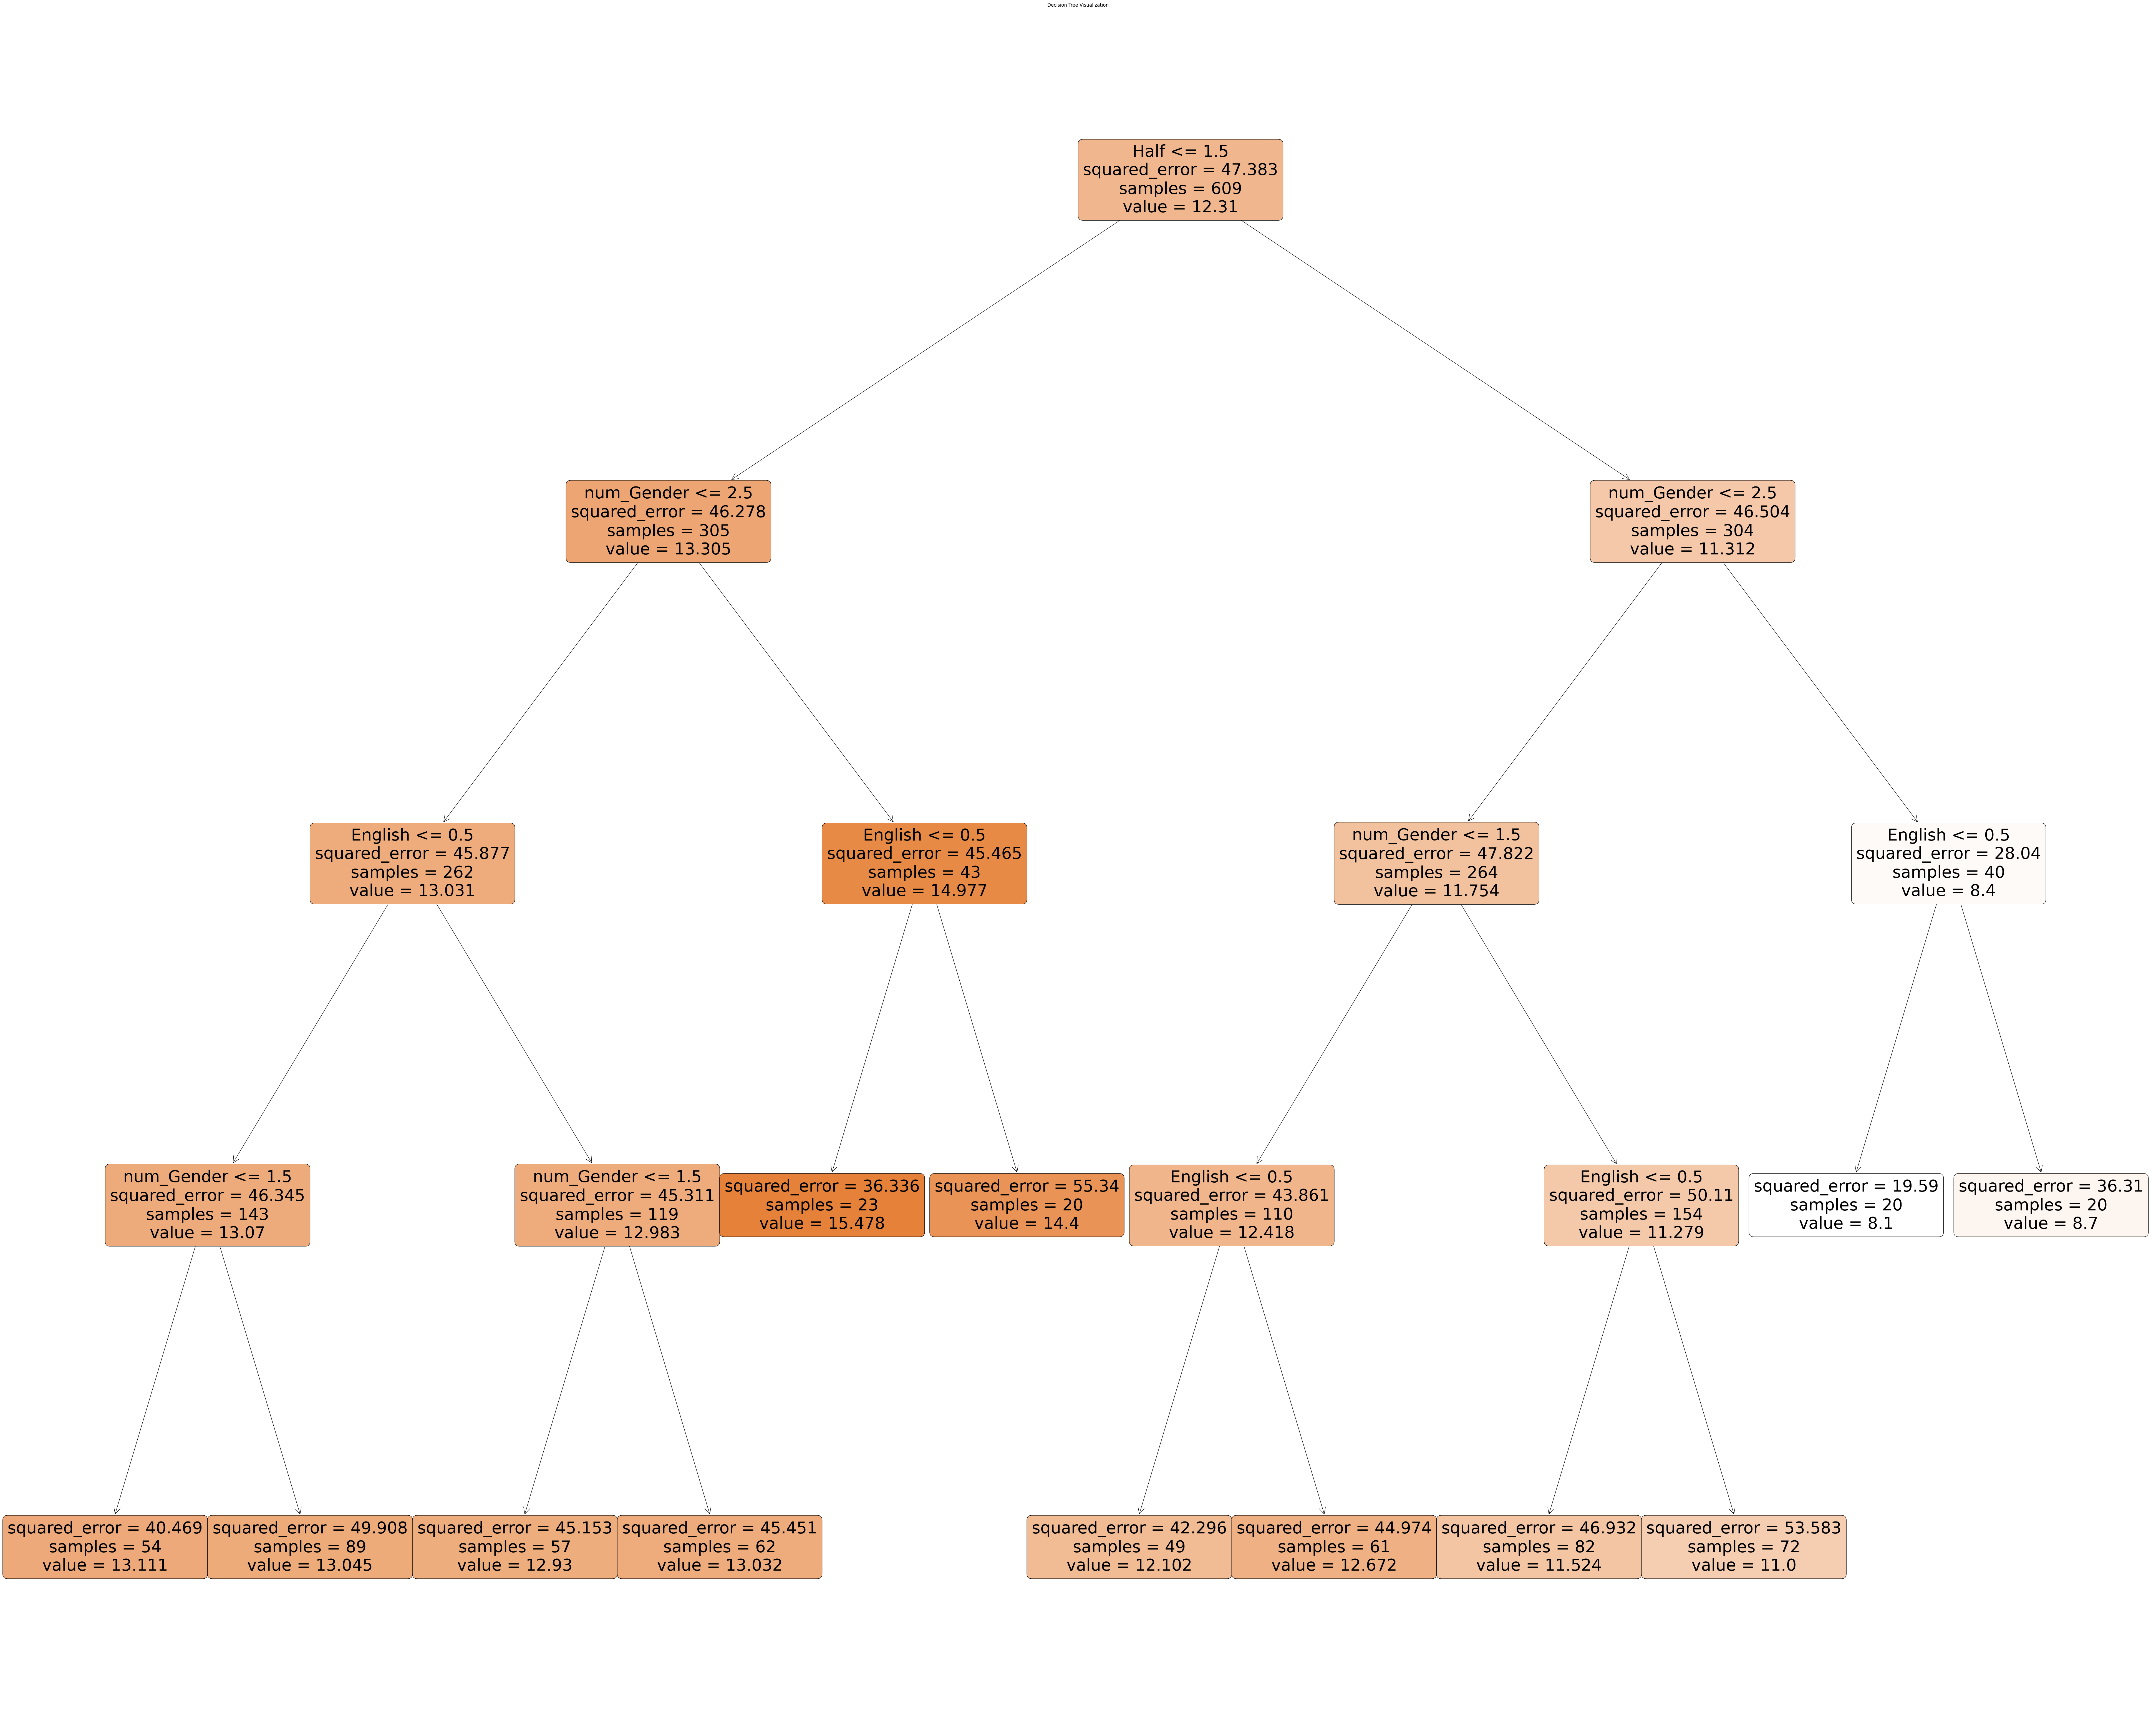

In [ ]:
# Required Libraries for the decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the data that will be used for this workBook
data = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Data Preprocessing by getting the 3 collums thatwill be used to see the feautes and then takes the thing it finding in this case the place_finalcollum to train the data
features = [ 'English', 'num_Gender','Half']
X = data[features]
y = data['place_final']

# Handling missing values by removiing them complity
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encoding categorical variables if needed eg Name of a Country like Croatia
X_encoded = pd.get_dummies(X_imputed)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.45, random_state=50)

# Model Training - Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Prediction of tree
y_pred = tree_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Decision Tree): {mse}")

# Visualizing the Decision Tree
plt.figure(figsize=(100, 80))
plot_tree(tree_model, feature_names=X_encoded.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


2008-2023 Table Genrator

In [ ]:
import pandas as pd # this here will import pandas which is what we will be using for this notebook

# This Function is being used to convert numerical values to words eg the half collum in the data et has 1 or 2 so it will check that collem and make so being display as either 1st half or 2nd half
def convert_to_words(df):
    df.index = range(1, len(df) + 1)  # this is to make sure that the index starts from 1
    df.index.name = 'Combo'

    # Mapping numerical values to words
    Languages = {0: 'Non-English', 1: 'English'}
    Genders = {1: 'Male', 2: 'Female', 3: 'Mixed'}
    HalfOfFinal = {1: '1st Half', 2: '2nd Half'}

    # Applying mappings to DataFrame columns
    df['English'] = df['English'].map(Languages)
    df['num_Gender'] = df['num_Gender'].map(Genders)
    df['Half'] = df['Half'].map(HalfOfFinal)

    return df

# Loads the dataset from Excel file
data = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Checks the occurrences of Place_Final Collum that it is eqiual to  1 for each combination that then English,num_Genders and Half coollems make up.
groupedData = data.groupby(['English', 'num_Gender', 'Half'])['place_final'].apply(lambda x: (x == 1).sum()).reset_index(name='WinsCount')

# Calculate total occurrences for each combination from the entire dataset by seeing thw total collums in the dataset which was done manully by me.
totalCount = 386

# Merge the total counts as a new column in the grouped data that was made earliy in the code
groupedData['Total'] = totalCount

# Calculate percentage likelihood of Place_Final equalling to 1 for each combination andd thens rounds the persenage up to 0.1
groupedData['PercentOfWining'] = (groupedData['WinsCount'] / groupedData['Total']) * 100
# Round the percentages to one decimal place
groupedData['PercentOfWining'] = groupedData['PercentOfWining'].round(1)

# Sort the DataFrame by 'PercentOfWining' in highest to lowest order
groupedData = groupedData.sort_values(by='PercentOfWining', ascending=False)

# Formats the DataFrame
formatted_data = convert_to_words(groupedData)

# Display the formatted table to the user

for idx, row in formatted_data.head(10).iterrows():
    print(f"{row['English']} |  {row['num_Gender']} | {row['Half']} | {row['WinsCount']}  | {row['PercentOfWining']}%")

English |  Female | 2nd Half | 11  | 2.8%
English |  Male | 2nd Half | 7  | 1.8%
Non-English |  Female | 2nd Half | 6  | 1.6%
Non-English |  Male | 1st Half | 4  | 1.0%
English |  Male | 1st Half | 4  | 1.0%
Non-English |  Female | 1st Half | 3  | 0.8%
English |  Female | 1st Half | 3  | 0.8%
English |  Mixed | 2nd Half | 3  | 0.8%
Non-English |  Male | 2nd Half | 2  | 0.5%
Non-English |  Mixed | 1st Half | 0  | 0.0%


2008 - 023 Pie Chart

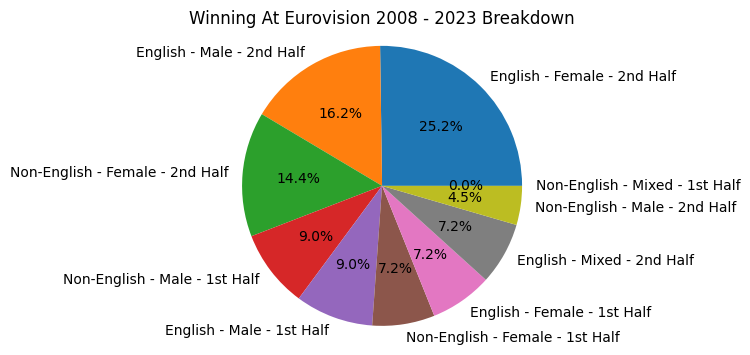

In [ ]:


# Filter the DataFrame to exclude rows where 'PercentOfWining' is equal to 0
noZeros = formatted_data[formatted_data['PercentOfWining'] != 0]

# Pie chart to display size
plt.figure(figsize=(5, 4))
#header name
plt.pie(nonZeros.head(10)['PercentOfWining'], labels=nonZeros.head(10).apply(lambda row: f"{row['English']} - {row['num_Gender']} - {row['Half']}", axis=1), autopct='%1.1f%%')
#title of pie chart
plt.title('Winning At Eurovision 2008 - 2023 Breakdown ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#shows the pie chart
plt.show()

2008 -2023 Decison Tree

Mean Squared Error (Decision Tree): 53.031023605432715


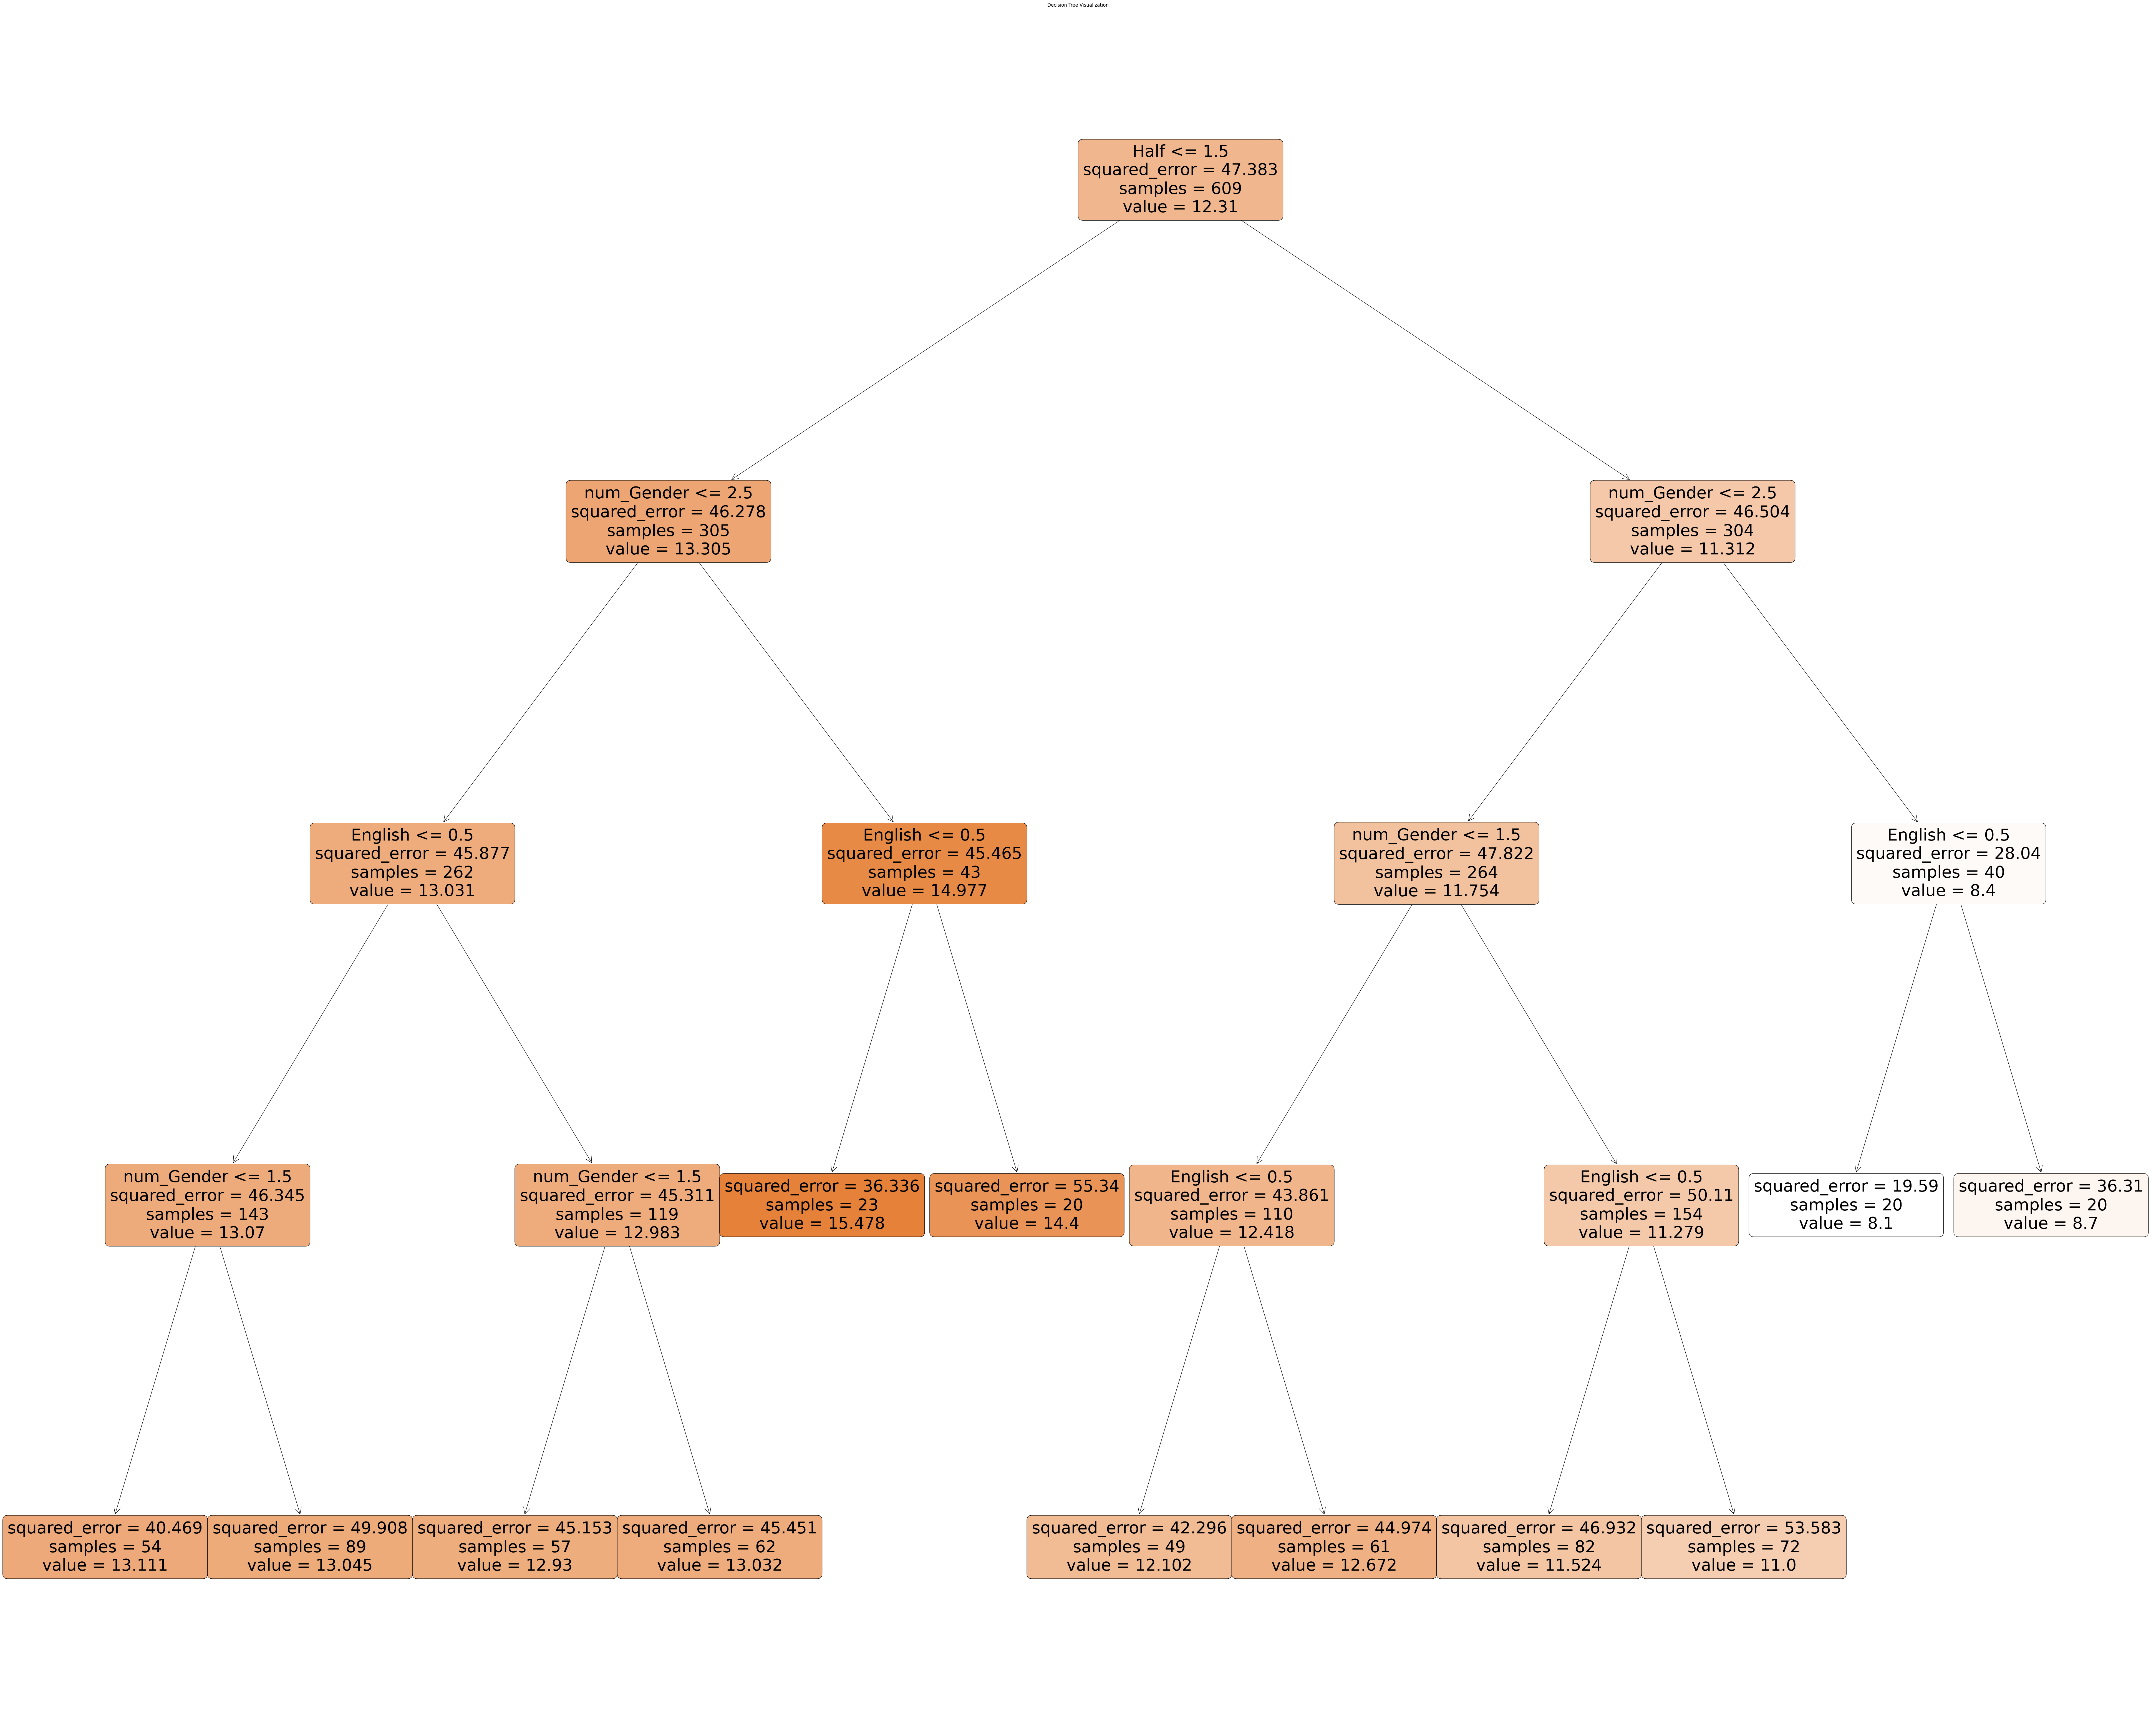

In [ ]:


# Load the data that will be used for this workBook
data = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Data Preprocessing by getting the 3 collums thatwill be used to see the feautes and then
features = [ 'English', 'num_Gender','Half']
X = data[features]
y = data['place_final']

# Handling missing values by removiing them complity
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encoding categorical variables if needed eg Name of a Country like Croatia
X_encoded = pd.get_dummies(X_imputed)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Model Training - Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Prediction of tree
y_pred = tree_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Decision Tree): {mse}")

# Visualizing the Decision Tree
plt.figure(figsize=(100, 80))
plot_tree(tree_model, feature_names=X_encoded.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


2016 - 2023 Table Generator

In [ ]:
import pandas as pd # this here will import pandas which is what we will be using for this notebook

# This Function is being used to convert numerical values to words eg the half collum in the data et has 1 or 2 so it will check that collem and make so being display as either 1st half or 2nd half
def convert_to_words(df):
    df.index = range(1, len(df) + 1)  # this is to make sure that the index starts from 1
    df.index.name = 'Combo'

    # Mapping numerical values to words
    Languages = {0: 'Non-English', 1: 'English'}
    Genders = {1: 'Male', 2: 'Female', 3: 'Mixed'}
    HalfOfFinal = {1: '1st Half', 2: '2nd Half'}

    # Applying mappings to DataFrame columns
    df['English'] = df['English'].map(Languages)
    df['num_Gender'] = df['num_Gender'].map(Genders)
    df['Half'] = df['Half'].map(HalfOfFinal)

    return df

# Loads the dataset from Excel file
data = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Checks the occurrences of Place_Final Collum that it is eqiual to  1 for each combination that then English,num_Genders and Half coollems make up.
groupedData = data.groupby(['English', 'num_Gender', 'Half'])['place_final'].apply(lambda x: (x == 1).sum()).reset_index(name='WinsCount')

# Calculate total occurrences for each combination from the entire dataset by seeing thw total collums in the dataset which was done manully by me.
totalCount = 181

# Merge the total counts as a new column in the grouped data that was made earliy in the code
groupedData['Total'] = totalCount

# Calculate percentage likelihood of Place_Final equalling to 1 for each combination andd thens rounds the persenage up to 0.1
groupedData['PercentOfWining'] = (groupedData['WinsCount'] / groupedData['Total']) * 100
# Round the percentages to one decimal place
groupedData['PercentOfWining'] = groupedData['PercentOfWining'].round(1)

# Sort the DataFrame by 'PercentOfWining' in highest to lowest order
groupedData = groupedData.sort_values(by='PercentOfWining', ascending=False)

# Formats the DataFrame
formatted_data = convert_to_words(groupedData)

# Display the formatted table to the user

for idx, row in formatted_data.head(10).iterrows():
    print(f"{row['English']} |  {row['num_Gender']} | {row['Half']} | {row['WinsCount']}  | {row['PercentOfWining']}%")

English |  Female | 2nd Half | 11  | 6.1%
English |  Male | 2nd Half | 7  | 3.9%
Non-English |  Female | 2nd Half | 6  | 3.3%
Non-English |  Male | 1st Half | 4  | 2.2%
English |  Male | 1st Half | 4  | 2.2%
Non-English |  Female | 1st Half | 3  | 1.7%
English |  Female | 1st Half | 3  | 1.7%
English |  Mixed | 2nd Half | 3  | 1.7%
Non-English |  Male | 2nd Half | 2  | 1.1%
Non-English |  Mixed | 1st Half | 0  | 0.0%


 2016 -2023 Pie Chart

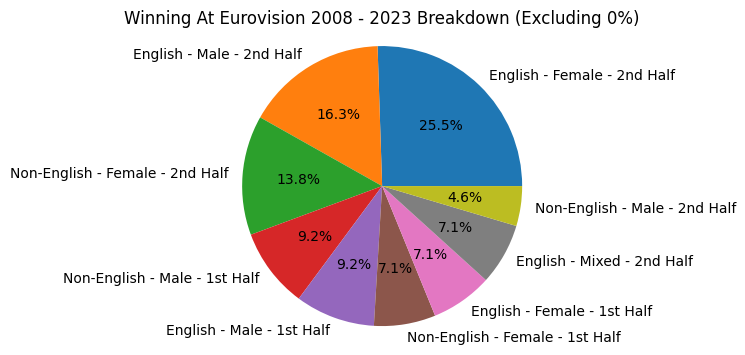

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to exclude rows where 'PercentOfWining' is equal to 0
noZeros = formatted_data[formatted_data['PercentOfWining'] != 0]

# Pie chart to display size
plt.figure(figsize=(5, 4))
#header name
plt.pie(nonZeros.head(10)['PercentOfWining'], labels=nonZeros.head(10).apply(lambda row: f"{row['English']} - {row['num_Gender']} - {row['Half']}", axis=1), autopct='%1.1f%%')
#title of pie chart
plt.title('Winning At Eurovision 2016 - 2023 Breakdown ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#shows the pie chart
plt.show()

2016 -2023 Decision Tree

Mean Squared Error (Decision Tree): 53.031023605432715


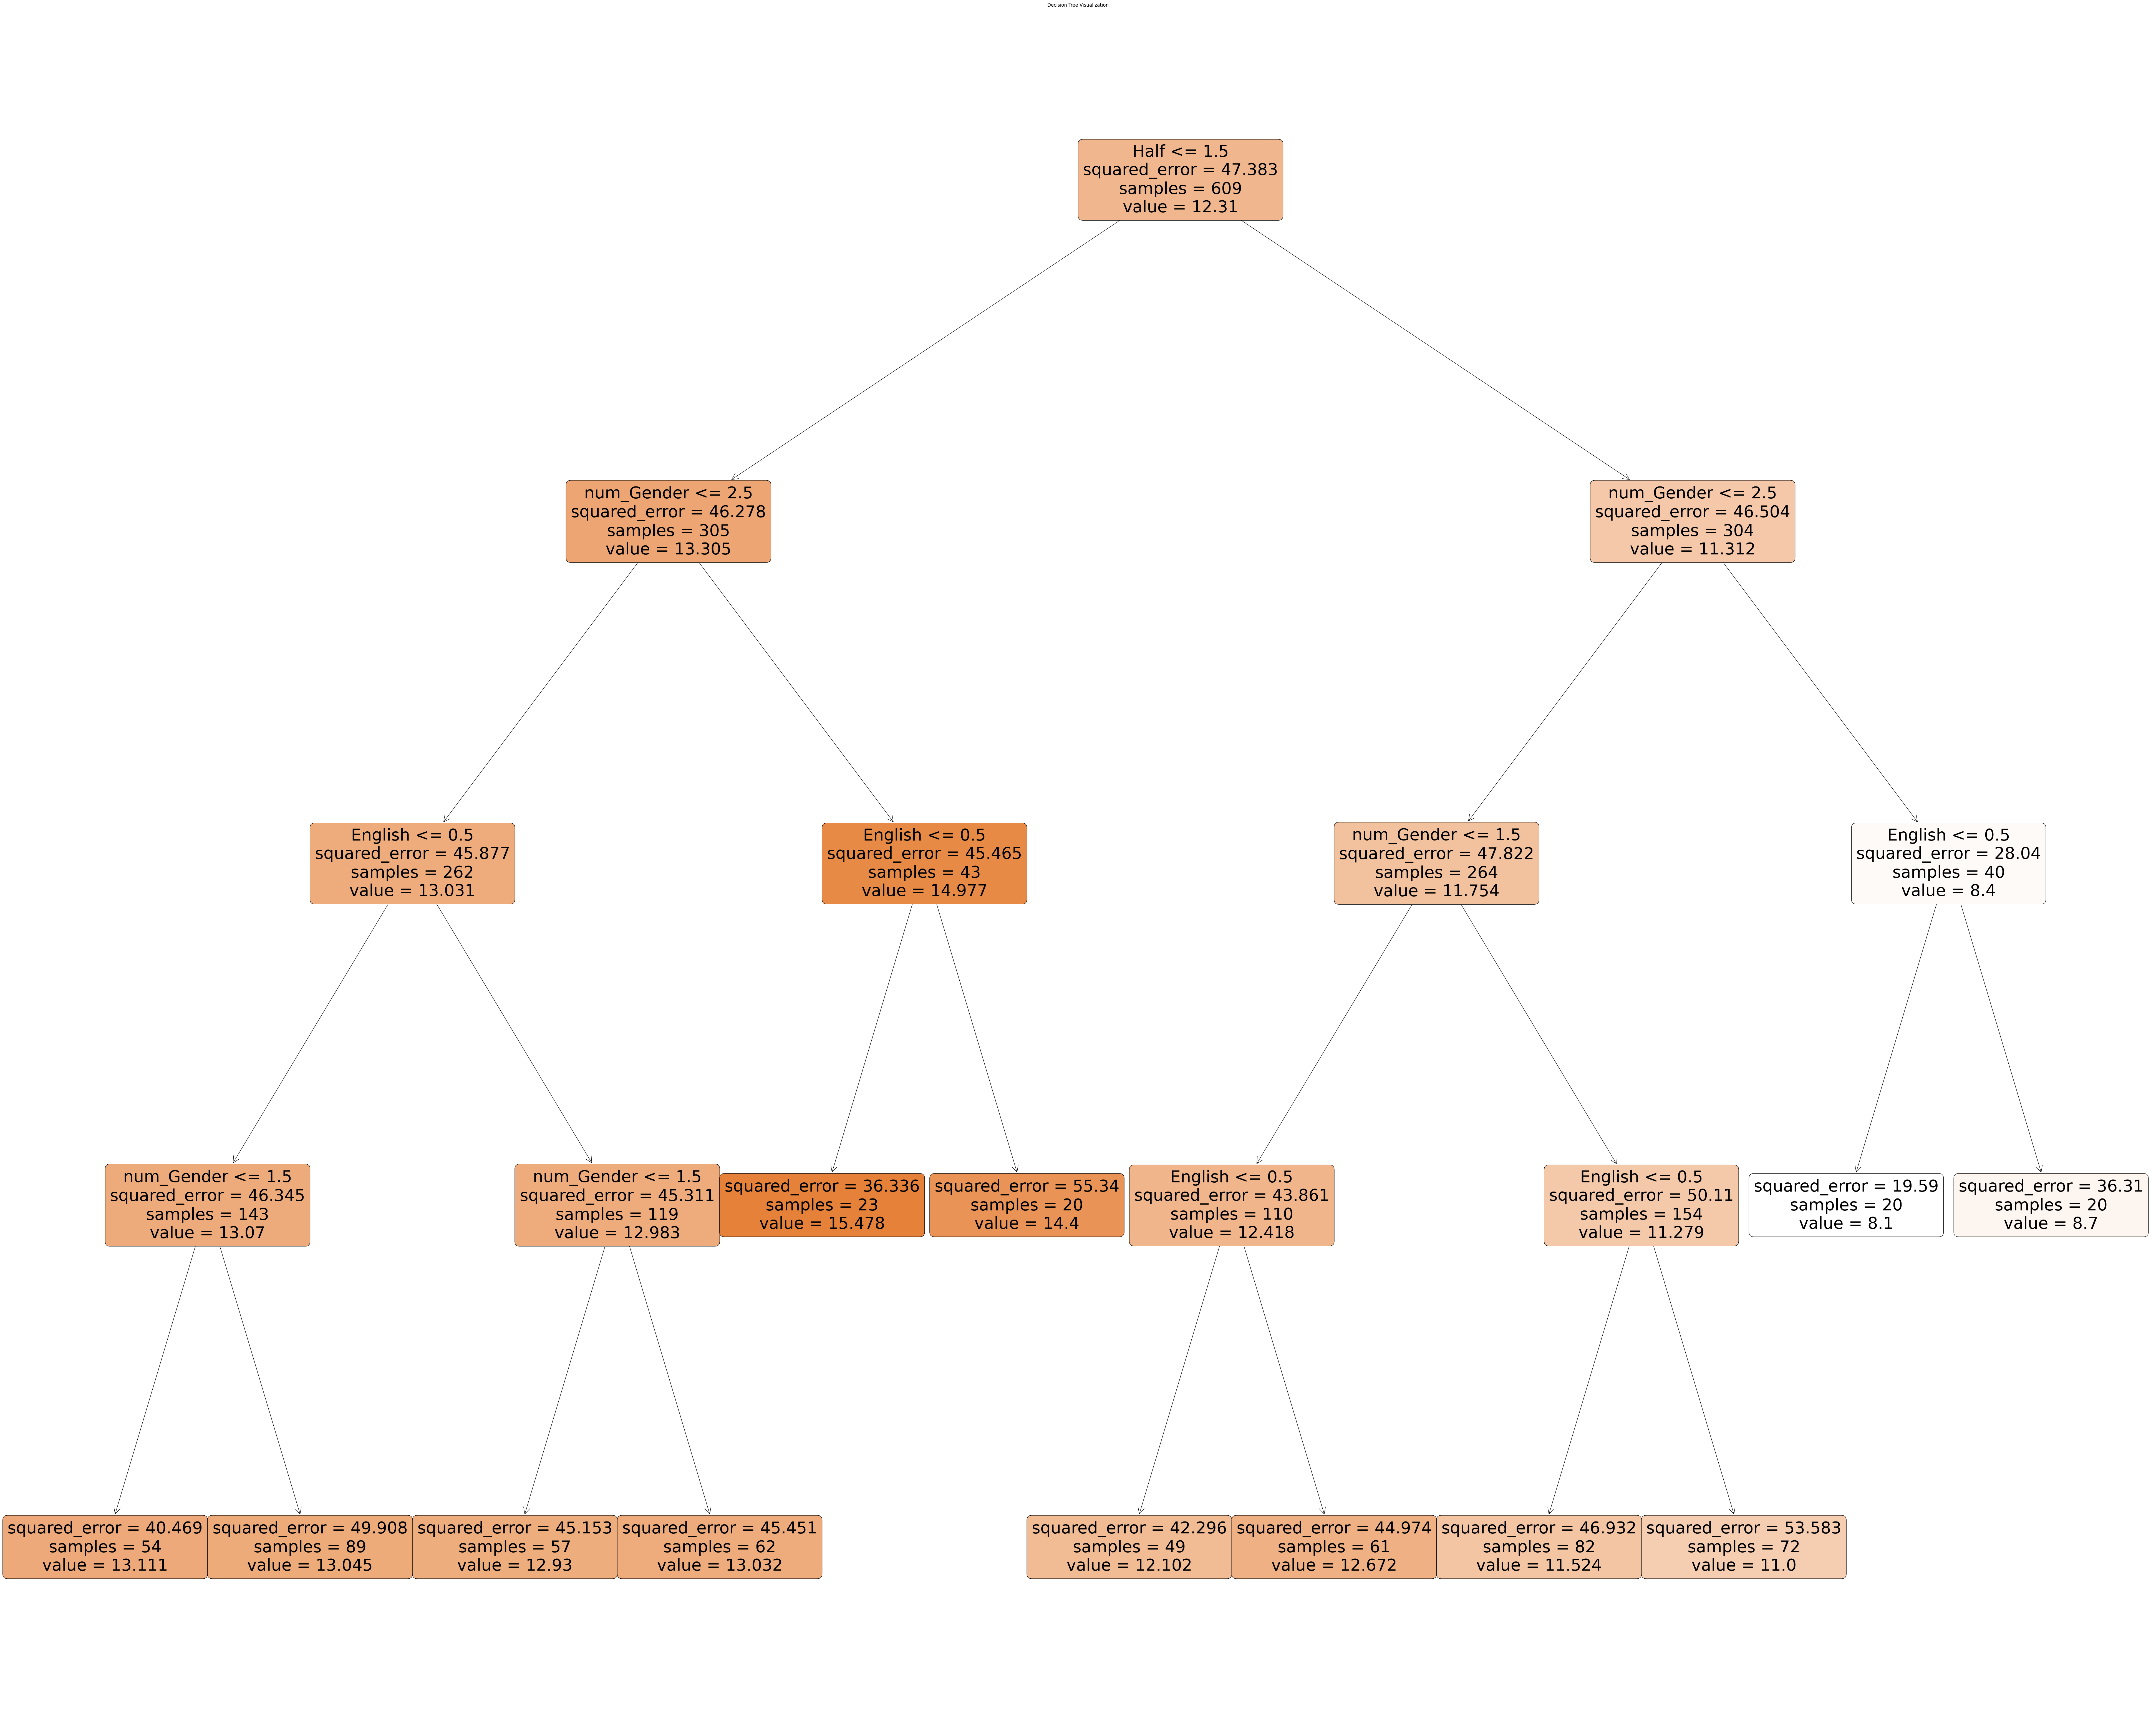

In [ ]:

# Load the data that will be used for this workBook
data = pd.read_excel('EurovisionDatasetCleaned.xlsx')

# Data Preprocessing by getting the 3 collums thatwill be used to see the feautes and then
features = [ 'English', 'num_Gender','Half']
X = data[features]
y = data['place_final']

# Handling missing values by removiing them complity
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encoding categorical variables if needed eg Name of a Country like Croatia
X_encoded = pd.get_dummies(X_imputed)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=42)

# Model Training - Decision Tree Regression
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Prediction of tree
y_pred = tree_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Decision Tree): {mse}")

# Visualizing the Decision Tree
plt.figure(figsize=(100, 80))
plot_tree(tree_model, feature_names=X_encoded.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()
